In [3]:
import pandas as pd
import helper
import strategy
import json

In [4]:
df = pd.read_csv("out_sample.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index("datetime", inplace=True)
df

,tickersymbol,price,quantity,SMA50,SMA20,STD20,UpperBB,LowerBB,Resistance,Support,AvgVolume20
datetime,,,,,,,,,,,
2023-01-03 08:45:00,VN30F2301,939.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 08:46:00,VN30F2301,941.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 08:47:00,VN30F2301,989.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 08:48:00,VN30F2301,993.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 08:49:00,VN30F2301,995.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20 14:39:00,VN30F2312,1095.0,0.0,1094.376,1095.170,0.563915,1096.297830,1094.042170,1096.7,1093.8,924967.60
2023-12-20 14:42:00,VN30F2312,1095.4,0.0,1094.418,1095.130,0.513092,1096.156184,1094.103816,1096.7,1093.8,858359.90
2023-12-20 14:43:00,VN30F2312,1095.5,0.0,1094.460,1095.110,0.488715,1096.087429,1094.132571,1096.7,1094.3,743971.60


In [5]:
# Load best parameters from saved JSON
with open("original_params.json", "r") as f:
    saved_trial = json.load(f)

# Extract parameters
params = saved_trial["params"]
initial_balance = 40_000_000  # Can still be custom-defined here

results1 = strategy.strategy(
    df,
    SMA_WINDOW_LENGTH=int(params["sma_window"]),
    TAKE_PROFIT_THRES_MEAN_REVERSION=float(params["tp_mean_rev"]),
    TAKE_PROFIT_THRES_MOMENTUM=float(params["tp_momentum"]),
    CUT_LOSS_THRES_MEAN_REVERSION=float(params["sl_mean_rev"]),
    CUT_LOSS_THRES_MOMENTUM=float(params["sl_momentum"]),
    initial_balance=initial_balance,
)

# Print results
for key, value in results1.items():
    if key != "PnL Over Time":
        print(f"{key}: {value}")

Initial Balance: 40000000
Final Balance: 105258000.00000004
Win Rate: 93.47826086956522
Total Trades: 46
Winning Trades: 43
Losing Trades: 3
Accumulated Return: 1.631450000000001
Sharpe Ratio: 0.019119642119491697
Max Drawdown: -0.015752822662429847


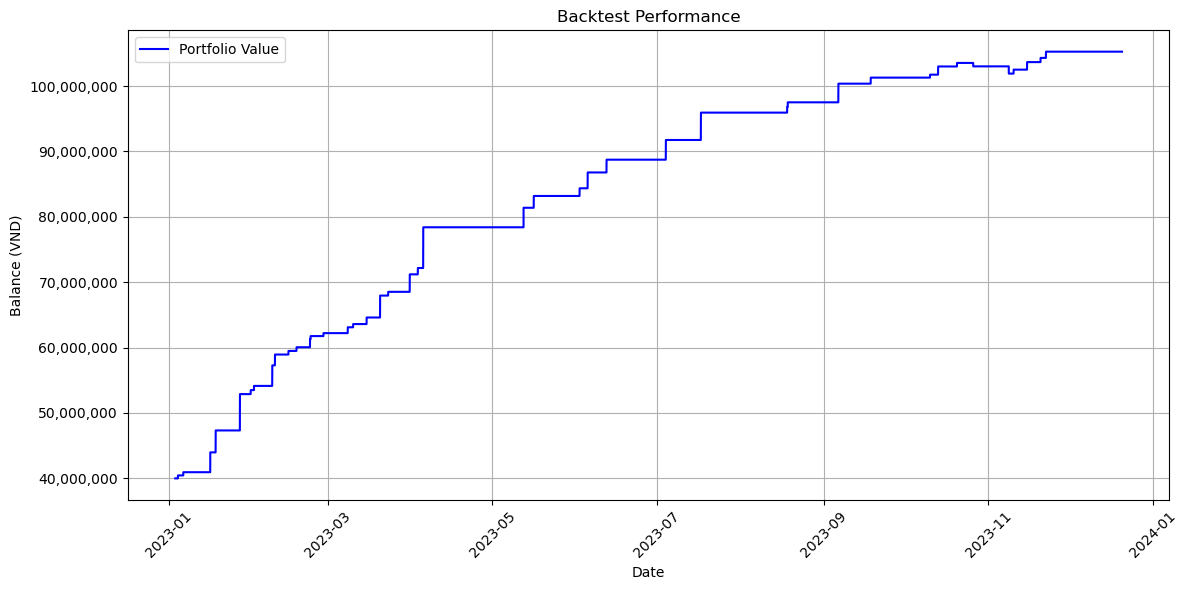

In [6]:
PnL = results1["PnL Over Time"]
date_list = df.index[int(params["sma_window"]) - 1:]  # Align dates with pnl_list length

helper.plot_performance(PnL, date_list)


# Optimized parameters

In [7]:
# Load best parameters from saved JSON
with open("best_trial_result.json", "r") as f:
    saved_trial = json.load(f)

# Extract parameters
params = saved_trial["params"]
initial_balance = 40_000_000  # Can still be custom-defined here

results2 = strategy.strategy(
    df,
    SMA_WINDOW_LENGTH=int(params["sma_window"]),
    TAKE_PROFIT_THRES_MEAN_REVERSION=float(params["tp_mean_rev"]),
    TAKE_PROFIT_THRES_MOMENTUM=float(params["tp_momentum"]),
    CUT_LOSS_THRES_MEAN_REVERSION=float(params["sl_mean_rev"]),
    CUT_LOSS_THRES_MOMENTUM=float(params["sl_momentum"]),
    initial_balance=initial_balance,
)

# Print results
for key, value in results2.items():
    if key != "PnL Over Time":
        print(f"{key}: {value}")

Initial Balance: 40000000
Final Balance: 114482000.00000006
Win Rate: 93.18181818181817
Total Trades: 44
Winning Trades: 41
Losing Trades: 3
Accumulated Return: 1.8620500000000013
Sharpe Ratio: 0.02010498585950021
Max Drawdown: -0.016528629306944747


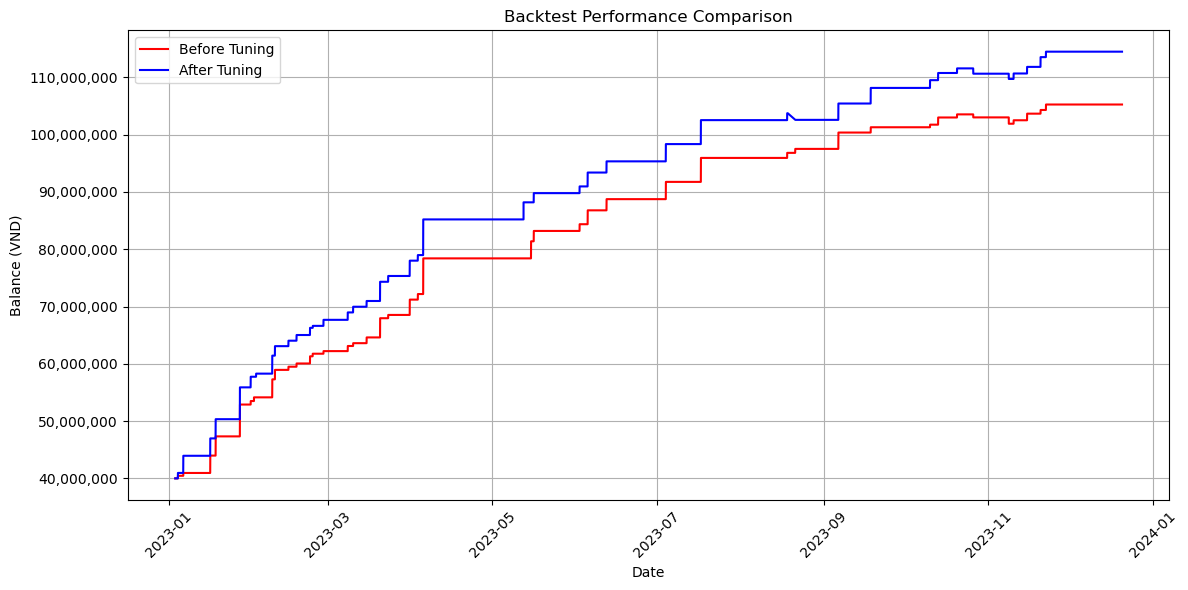

In [8]:
dates = df.index[int(params["sma_window"]) - 1:]
helper.plot_comparison(results1, results2, dates)